In [79]:
%pip install tabula
import pandas as pd
import tabula
import numpy as np
from IPython.utils import io
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.


# 1.  Statistiques descriptives à partir des données importées

In [80]:
try:
    with io.capture_output():
        %run -i "Calendrier.ipynb"
except Exception as e:
    display(e)

In [81]:
try:
    with io.capture_output():
        %run -i "Informations lieux des compétitions.ipynb"
except Exception as e:
    display(e)

In [82]:
try:
    with io.capture_output():
        %run -i "Informations lignes métro.ipynb"
except Exception as e:
    display(e)

## Nombre de personnes attendues aux lieux des compétitions 

In [83]:
# Suppression des tirets et mise en majuscule du début de chaque mot dans la colonne "Lieu"
formatted_lieux = df['Lieu'].apply(lambda x: x.replace('-', ' ').title())

# Création du diagramme à barres interactif avec Plotly en utilisant les nouvelles étiquettes
fig = go.Figure(data=[
    go.Bar(x=formatted_lieux, y=df["Nombre de personnes à l'événément"])
])

fig.update_layout(
    title="Nombre de personnes attendues aux lieux des compétitions",
    xaxis=dict(title='Lieu'),
    yaxis=dict(title="Nombre de personnes"),
    xaxis_tickangle=-45  # Rotation des étiquettes x pour une meilleure lisibilité
)

fig.show()

## Répartition du trafic sur chaque ligne de métro

In [84]:
for k in numéro:
    k_str = str(k)
    current_table = tableaux[f'ligne numéro[{k_str}]']

    current_table['Part du trafic de la station par rapport à toute la ligne'] *= 100

    # Créer le graphique en camembert pour le tableau actuel
    fig = px.pie(
        current_table,
        values='Part du trafic de la station par rapport à toute la ligne',
        names='Station',
        title=f"Répartition du trafic pour la ligne numéro {k_str}"
    )
    fig.show()

# 2. Statistiques descriptives à partir des programmes de prédiction 

In [85]:
try:
    with io.capture_output():
        %run -i "Programmes.ipynb"
except Exception as e:
    display(e)

## Prédictions de l'affluence de chaque station de la ligne 1

0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


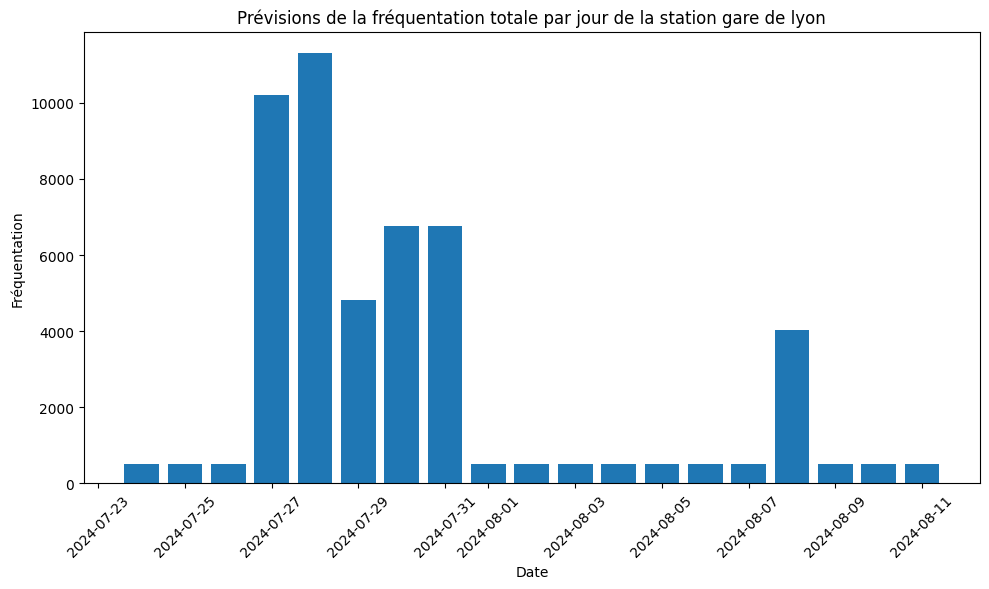

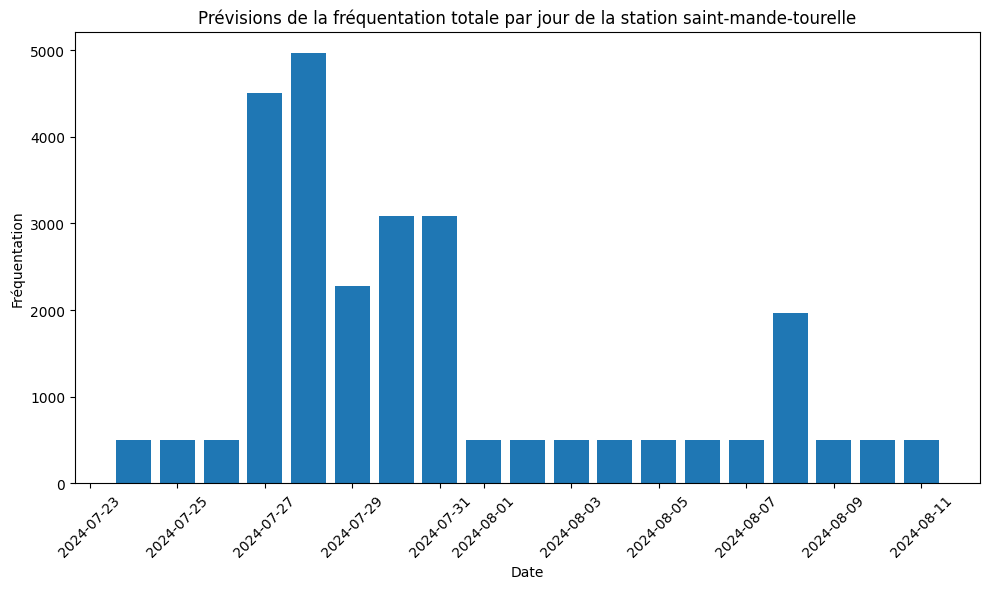

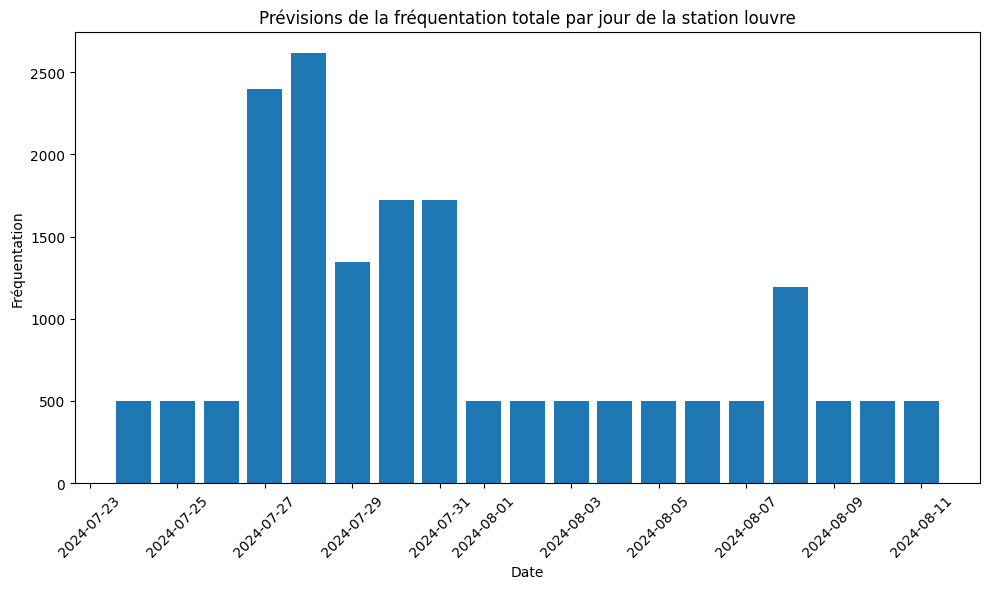

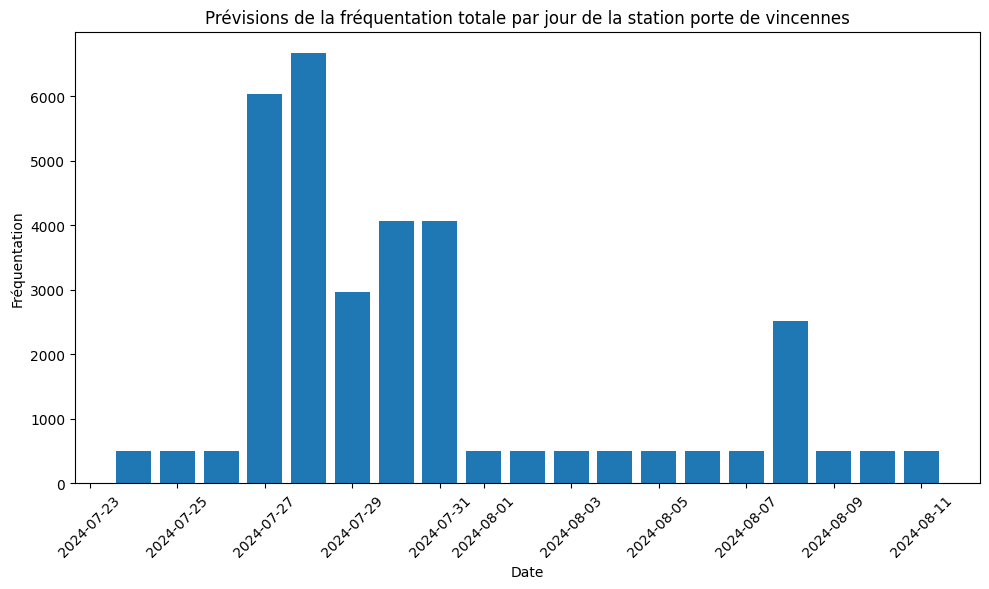

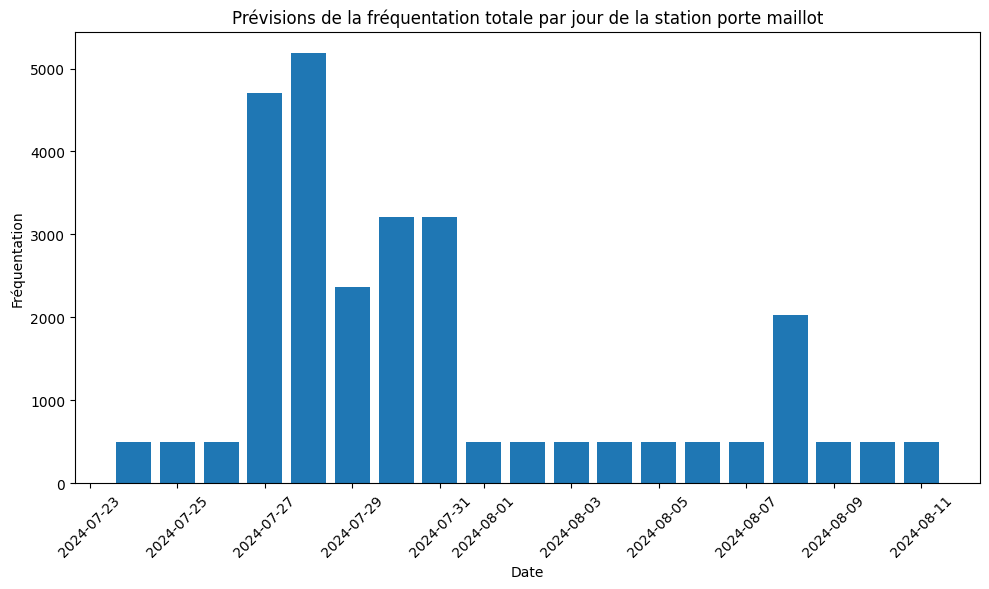

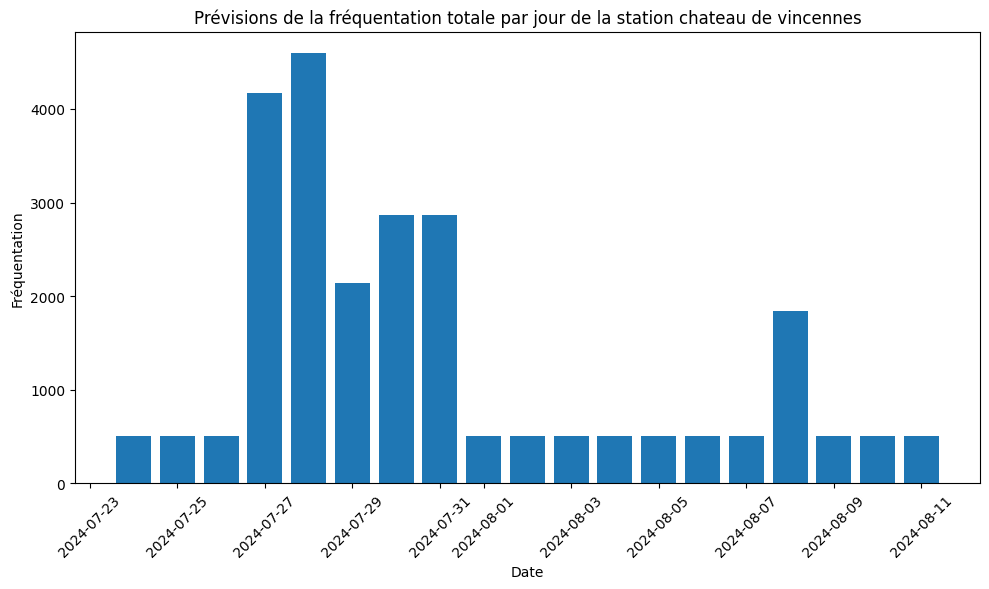

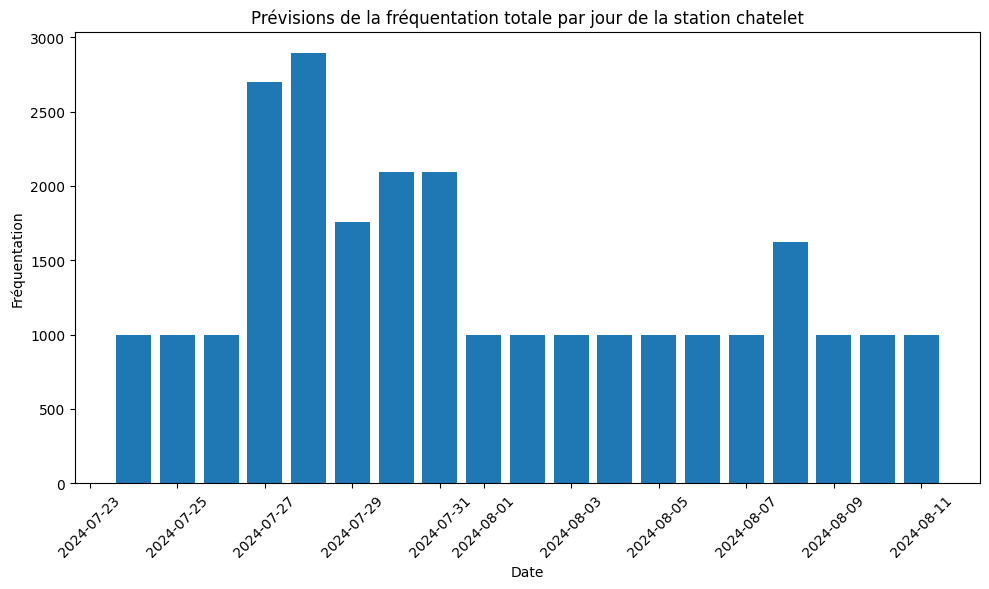

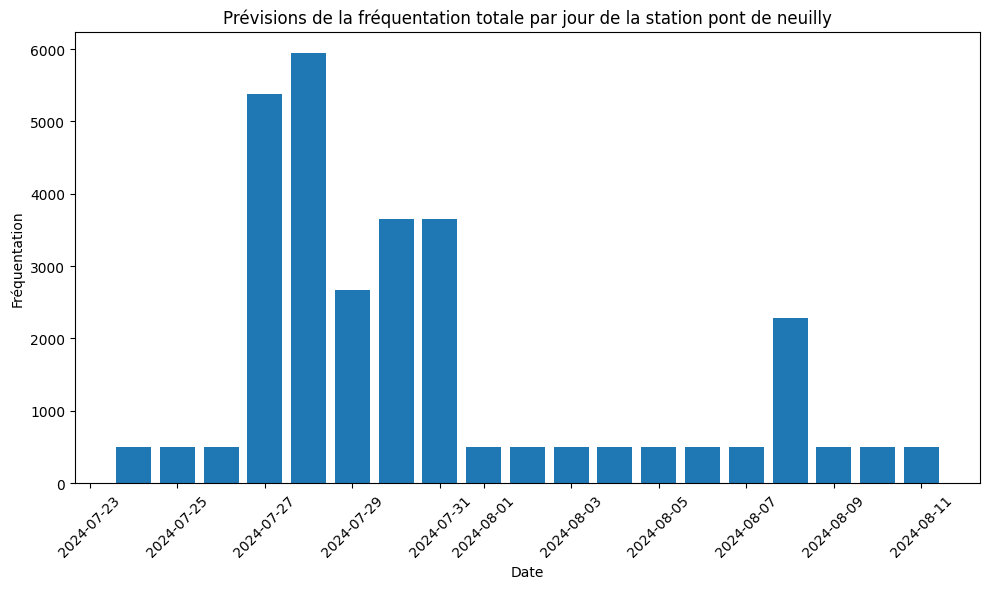

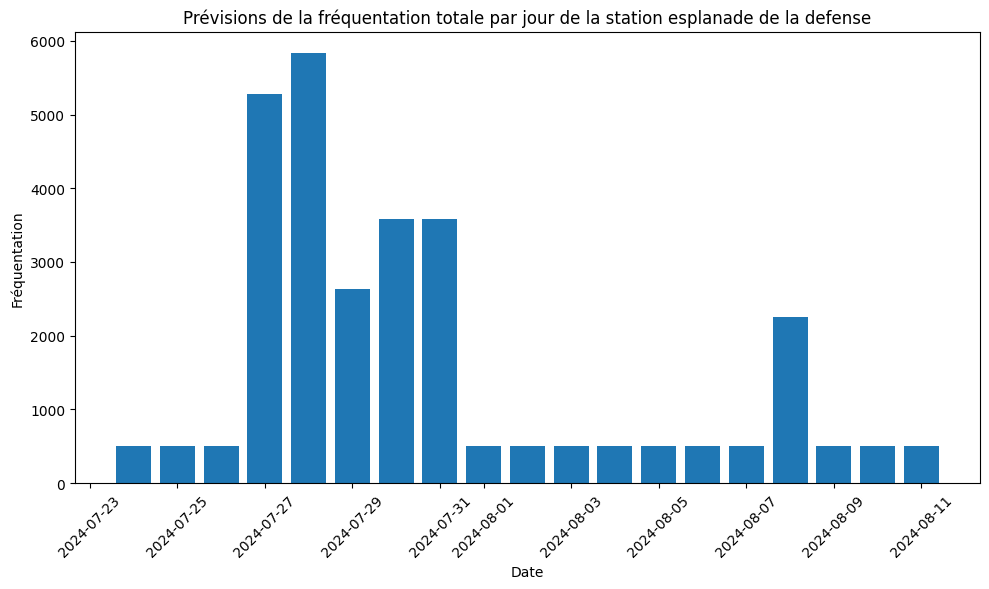

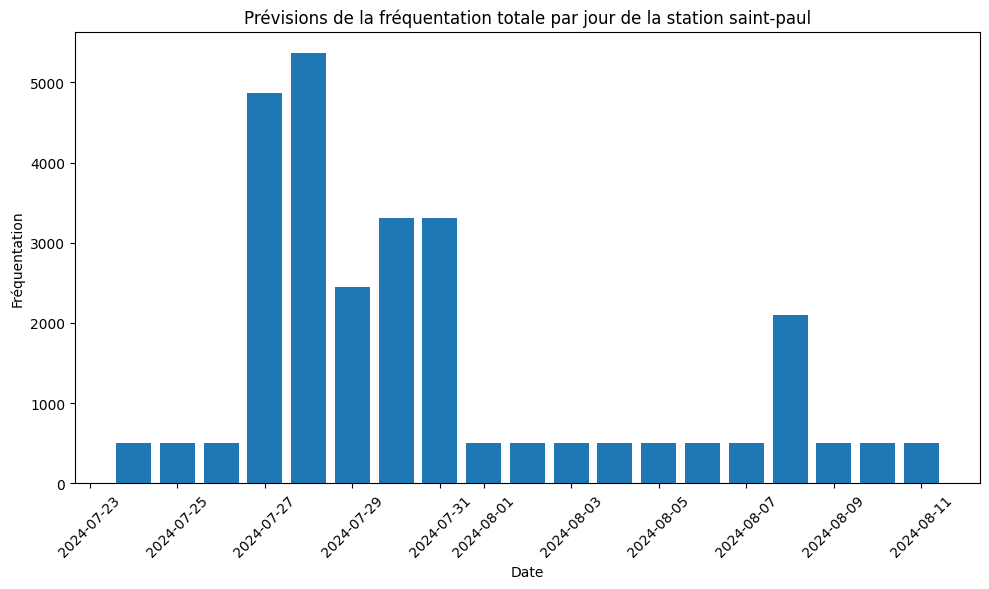

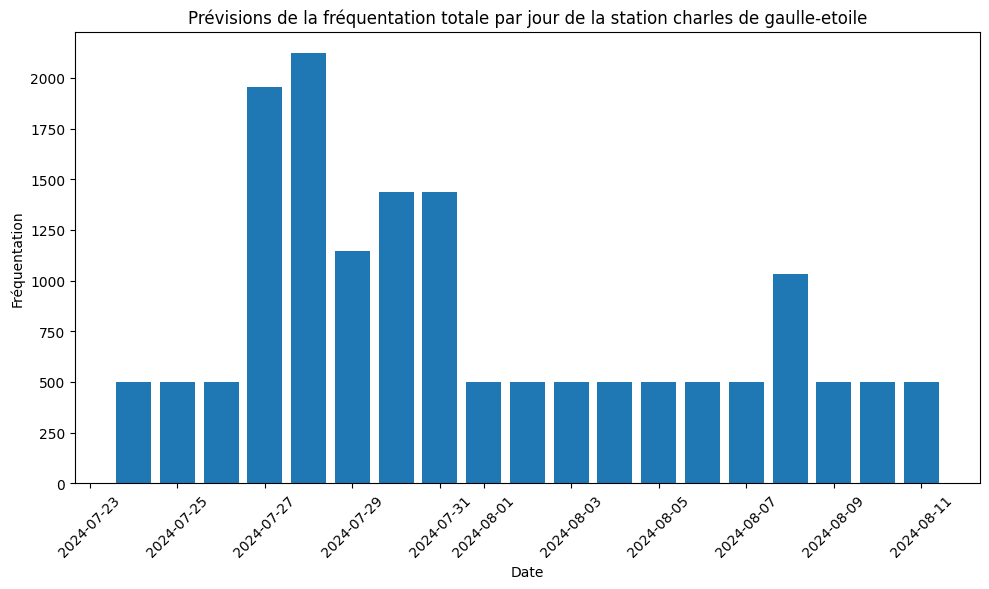

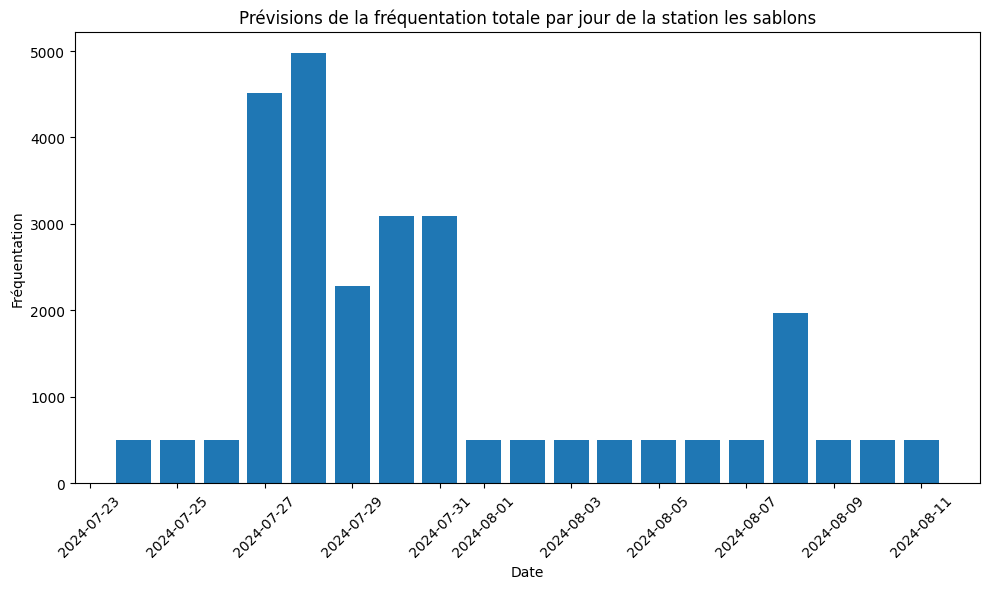

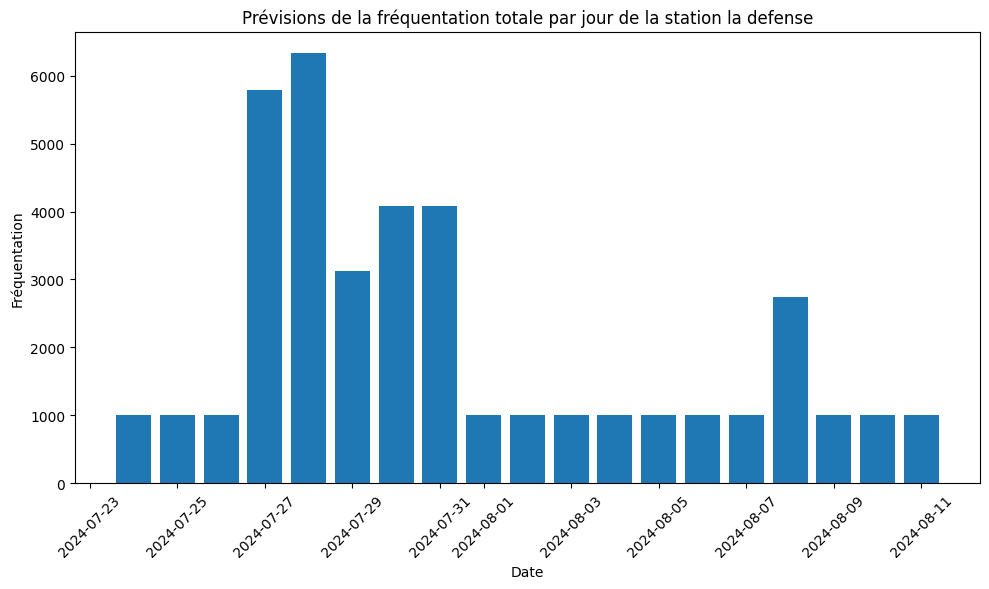

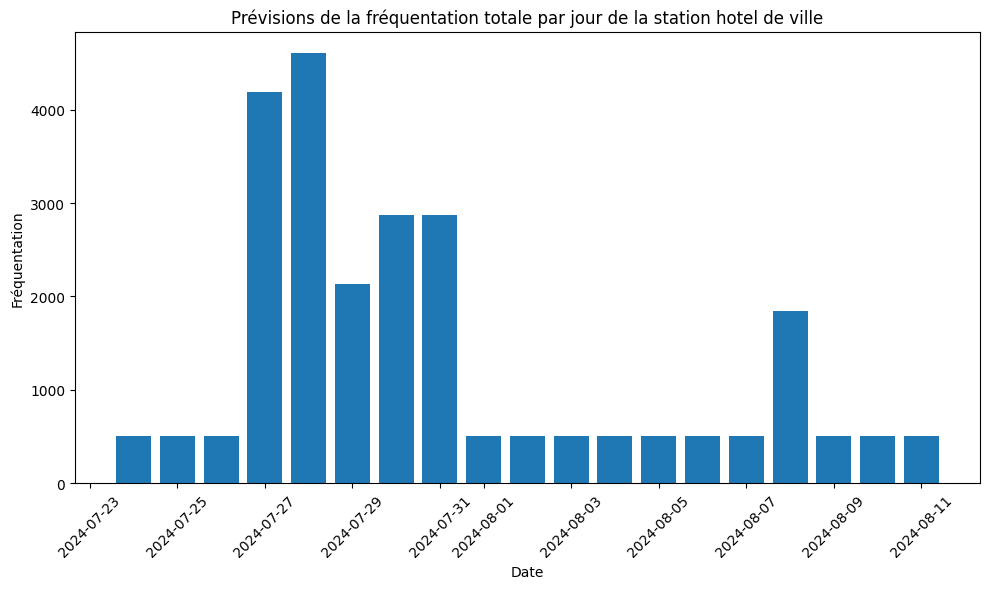

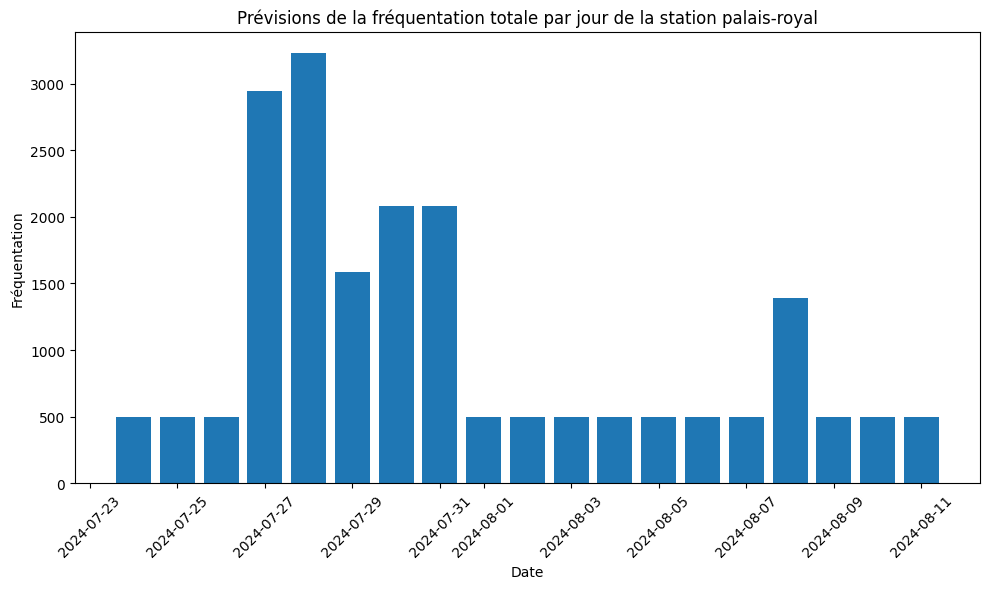

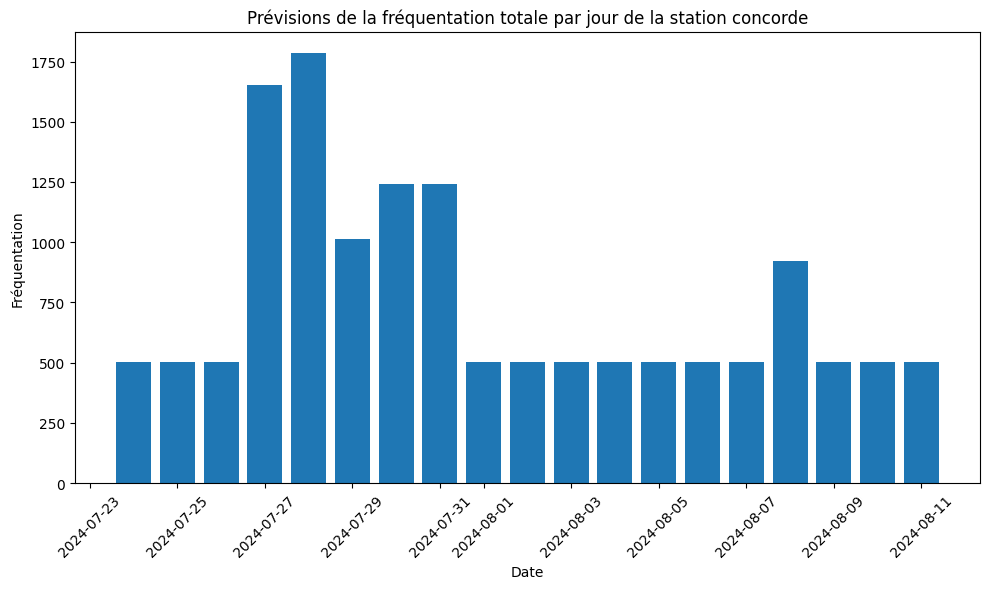

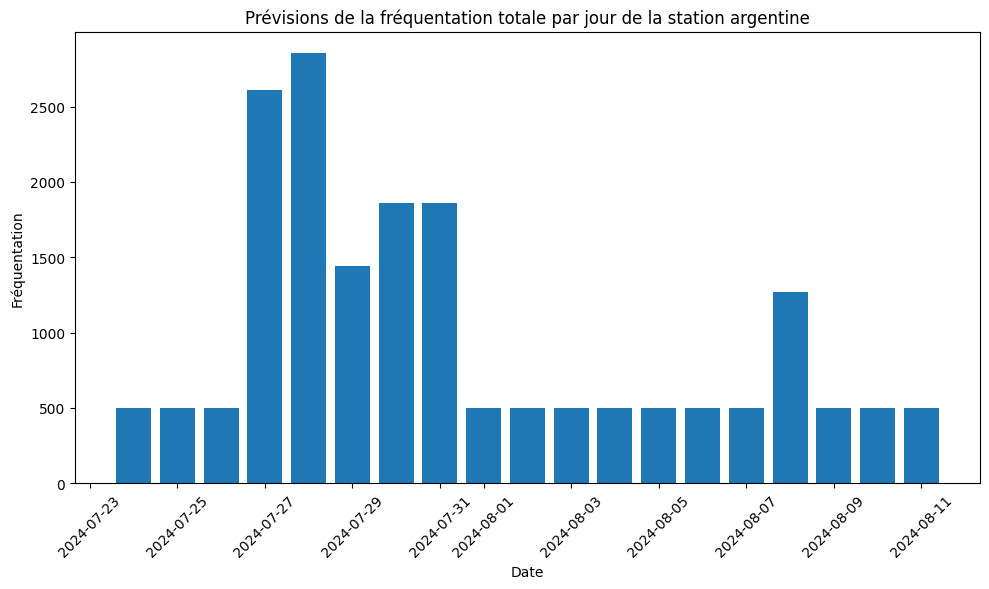

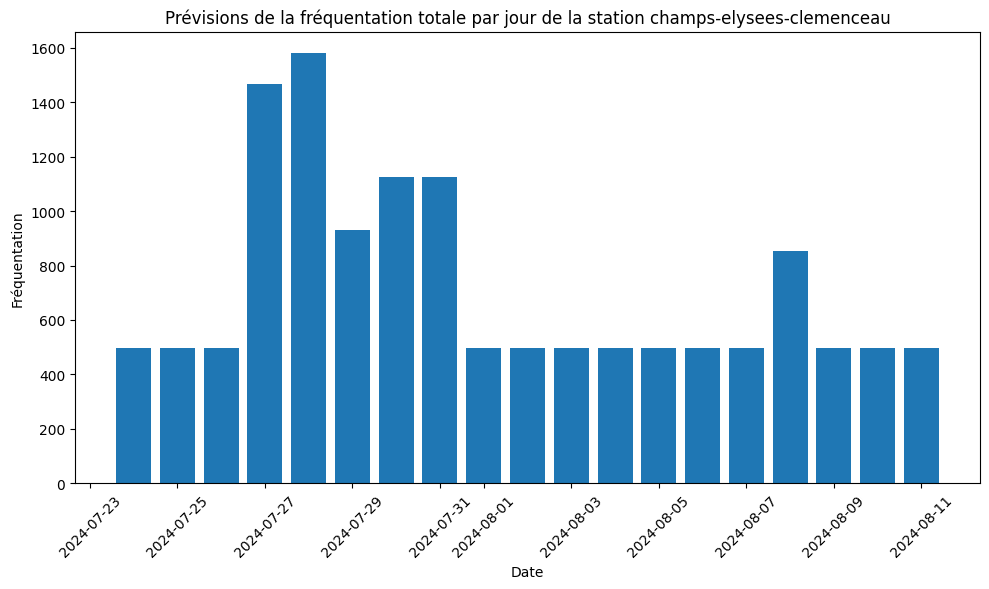

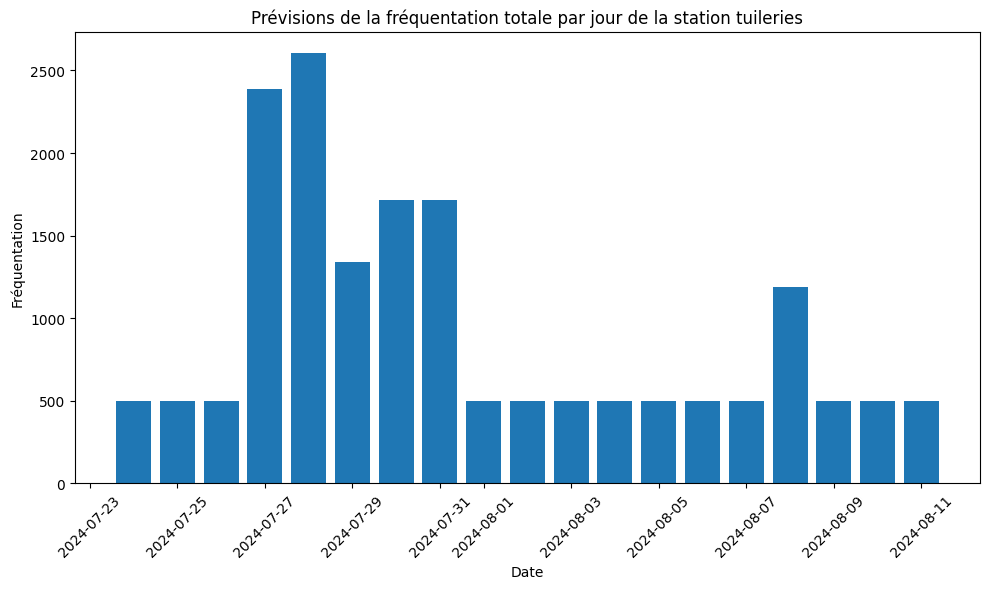

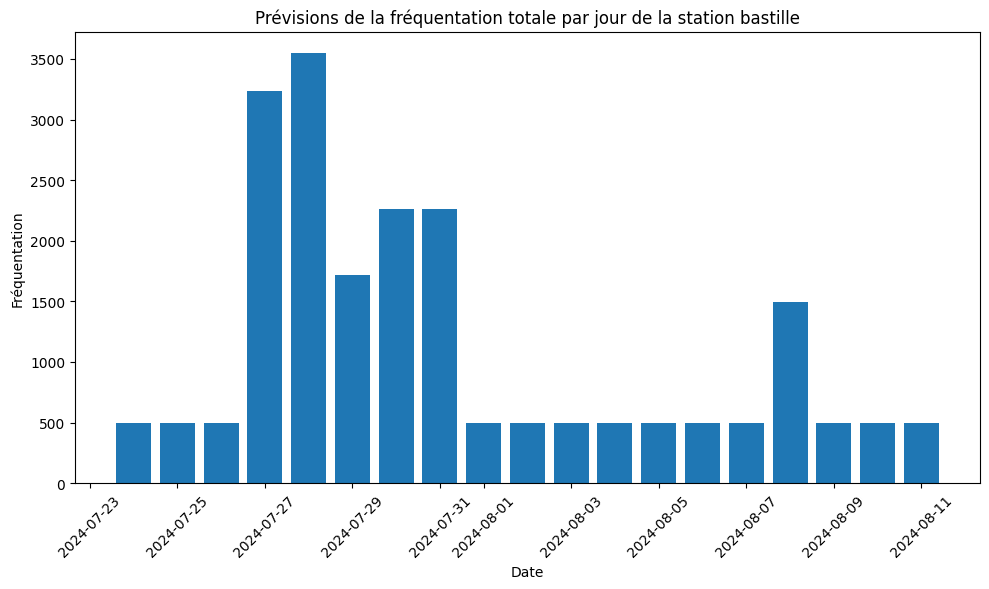

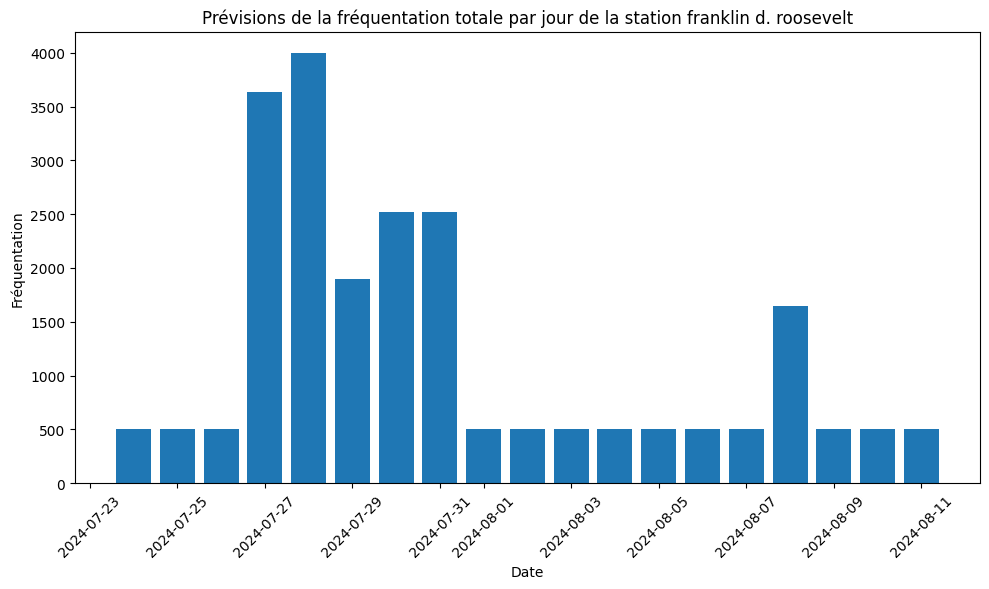

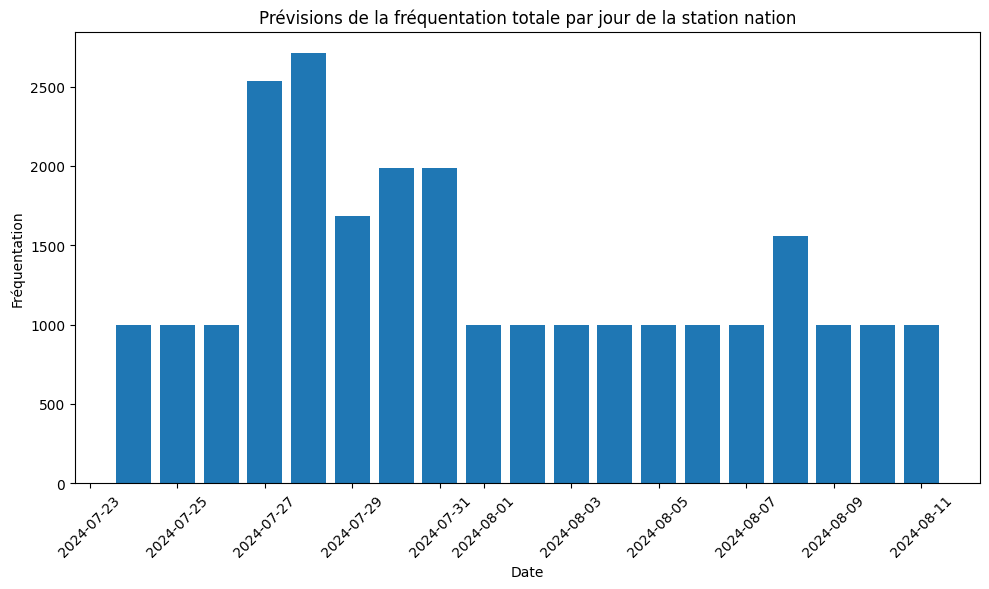

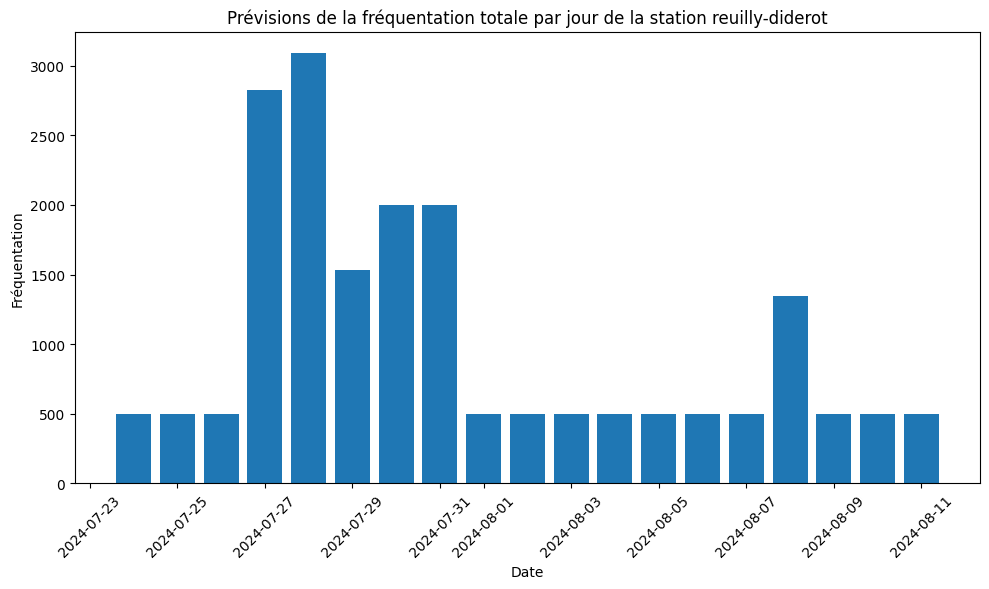

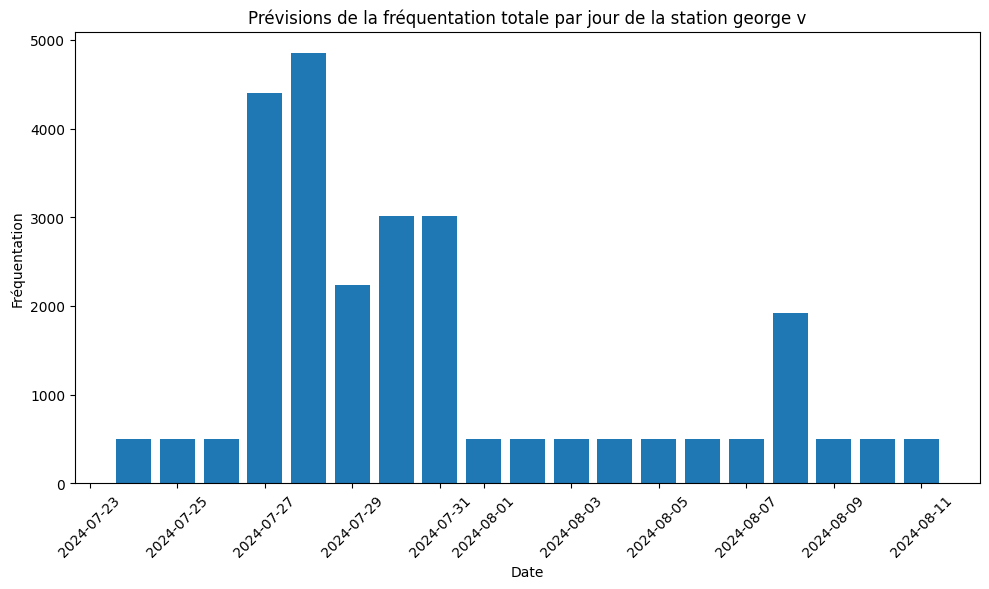

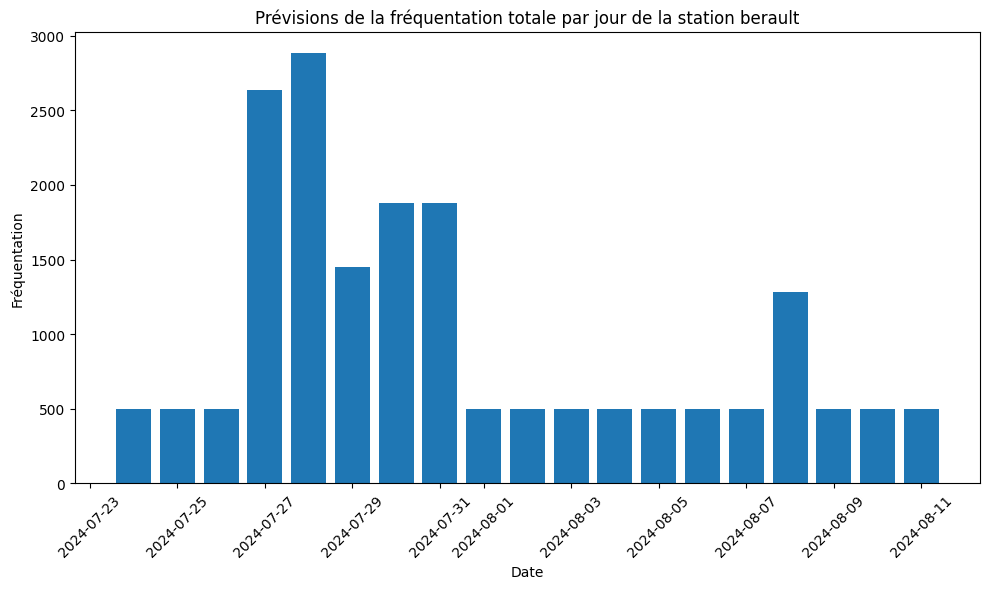

In [86]:
stations = tableaux['ligne numéro[1]']['Station'].unique()

# Créer un dictionnaire pour stocker les résultats par station
resultats_par_station = {}

# Parcourir chaque station et effectuer le traitement
for station_info in stations:
    resultats_total_station = []

    for date in dates:
        for heure in heures:
            try:
                total_station, _ = info_trafic(date, heure, station_info, ligne_info);

                if total_station is not None:
                    resultats_total_station.append((date, heure, total_station));

            except ValueError as e:
                print(e)
                print("Erreur dans le calcul des affluences.");

    # Convertir la liste en DataFrame
    df_resultats_station = pd.DataFrame(resultats_total_station, columns=['Date', 'Heure', 'Total Station'])
    df_resultats_station.set_index(['Date', 'Heure'], inplace=True)

    # Convertir la colonne 'Date' au format datetime
    df_resultats_station.index = pd.to_datetime(df_resultats_station.index.get_level_values('Date'))

    # Somme de fréquentation par jour
    daily_sum = df_resultats_station.groupby(df_resultats_station.index.date)['Total Station'].sum()

    # Stocker les résultats dans le dictionnaire resultats_par_station
    resultats_par_station[station_info] = daily_sum

    # Parcourir chaque station et ses résultats
for station, daily_sum in resultats_par_station.items():
    # Créer le graphe en barres
    plt.figure(figsize=(10, 6))  # Définir la taille du graphe
    plt.bar(daily_sum.index, daily_sum.values)
    
    plt.title(f"Prévisions de la fréquentation totale par jour de la station {station}")
    plt.xlabel("Date")
    plt.ylabel("Fréquentation")
    plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
    
    # Afficher le graphe
    plt.tight_layout()
    plt.show()

## Prédictions de l'affluence sur les lignes 1, 6, 8, 9, 12 et 13 (lignes particulièrement empruntées pour aller aux lieux des compétitions)

In [87]:
numeros = [1, 6, 8, 9, 12, 13]

for k in numeros:
    k_str = str(k)
    stations = tableaux[f'ligne numéro[{k_str}]']['Station'].unique()
    resultats_par_station = {}

    for station_info in stations:
        resultats_total_station = []

        for date in dates:
            for heure in heures:
                try:
                    total_station, _ = info_trafic(date, heure, station_info, k_str)

                    if total_station is not None:
                        resultats_total_station.append((date, heure, total_station))

                except ValueError as e:
                    print(e)
                    print("Erreur dans le calcul des affluences.")

        df_resultats_station = pd.DataFrame(resultats_total_station, columns=['Date', 'Heure', 'Total Station'])
        df_resultats_station.set_index(['Date', 'Heure'], inplace=True)
        df_resultats_station.index = pd.to_datetime(df_resultats_station.index.get_level_values('Date'))

        daily_sum = df_resultats_station.groupby(df_resultats_station.index.date)['Total Station'].sum()
        resultats_par_station[station_info] = daily_sum

    data = pd.DataFrame()

    for station, daily_sum in resultats_par_station.items():
        data[station] = daily_sum

    fig = px.bar(data.reset_index(), x='index', y=data.columns, title=f'Fréquentation totale estimée par jour par station - Ligne {k_str}',
                 labels={'index': 'Date', 'value': 'Fréquentation', 'variable': 'Station'})

    fig.update_xaxes(type='category')  
    fig.update_xaxes(categoryorder='total ascending')  
    fig.update_layout(barmode='stack')  
    fig.show()


0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
0
0
0
0
0
0
0
0
0
0
cannot convert float NaN to integer
0
cannot convert float NaN to integer
0
cannot convert float NaN to in

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
